## Volatility for Returns of SNT against underlying Assets


Instructions for adding a new comparable asset:
1. Load data in Dataset Import Cell
2. Add Name to tickers and df_names **ORDER MUST MATCH**

Instructions for new length of analysis:
1. Change Start to desired start time
2. Change End to desired end time.

*Be aware of varying lengths of history for comparable assets for competeness of analysis. However, index created is for every between specified start and end dates*

In [1]:
# Standard Library Imports
#import pandas as pd
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#from tabulate import tabulate
from scipy import stats
sns.set_style('whitegrid')
import datetime as dt

%matplotlib inline

In [2]:
# import quandl
# quandl.ApiConfig.api_key = 'BzJzsU5Cxxc3BPJteJdu'
# T_bill  = quandl.get('EOD/BIL')

### Comparison to Other Currencies and Stock Market Indices
#### Dataset Import

In [3]:
# 3 year cryptcompare
btc_usd = pd.read_csv('data\BTC_USD.csv')
eth_usd = pd.read_csv('data\ETH_USD.csv')
eth_btc = pd.read_csv('data\ETH_BTC.csv')
snt_btc = pd.read_csv('data\SNT_BTC.csv')
snt_eth = pd.read_csv('data\SNT_ETH.csv')
snt_usd = pd.read_csv('data\SNT_USD.csv')

In [4]:
snt_usd.head()

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,ts,timeDate
0,1496534400000,0.0,0.0,0.0,0.0,0.0,0.0,direct,NaN,1496534400,2017-06-03
1,1496620800000,0.0,0.0,0.0,0.0,0.0,0.0,direct,NaN,1496620800,2017-06-04
2,1496707200000,0.0,0.0,0.0,0.0,0.0,0.0,direct,NaN,1496707200,2017-06-05
3,1496793600000,0.0,0.0,0.0,0.0,0.0,0.0,direct,NaN,1496793600,2017-06-06
4,1496880000000,0.0,0.0,0.0,0.0,0.0,0.0,direct,NaN,1496880000,2017-06-07


### ADD EVERY TICKER NAME HERE!

In [5]:
# order in both lists MUST MATCH
tickers=[ 'btc_usd','eth_usd', 'eth_btc','snt_btc','snt_eth', 'snt_usd'] 
df_names = [btc_usd, eth_usd,   eth_btc,  snt_btc, snt_eth, snt_usd]

### Set START DATE AND END DATE OF ANALYSIS

In [6]:

# Y , M , D
start = dt.datetime(2018, 12, 1)


#Enter a specific date or today
end = dt.datetime(2020, 6, 3)

#end = dt.date.today()
print(start)

2018-12-01 00:00:00


Make a dataframe starts and ends at Time specified, date as index, and columns the close price of assets in question

In [7]:
df=pd.DataFrame()

df['timeDate'] = pd.to_datetime([start + dt.timedelta(days=x) for x in range(0, (end-start).days)], format = '%Y/%m/%d')

# df.Date = pd.to_datetime(df.Date, format = '%Y/%m/%d')
# df = df[df.Date  >= start ]
df = df.set_index('timeDate')

for count, name in enumerate(df_names):
    df = df.join(name.set_index('timeDate').close.rename(tickers[count]))


In [8]:
df.head()

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
timeDate,,,,,,
2018-12-01,4166.34,115.96,0.02805,0.000005,0.000173,0.02030
2018-12-02,3905.45,108.23,0.02798,0.000005,0.000169,0.01825
2018-12-03,3963.78,109.82,0.02780,0.000005,0.000169,0.01954
2018-12-04,3781.66,101.57,0.02725,0.000005,0.000171,0.01751
2018-12-05,3512.48,90.43,0.02599,0.000005,0.000175,0.01650


### Daily Percent Change
#### daily_df is a dataframe of daily returns

In [9]:
daily_df=pd.DataFrame(df.index, copy =True)
daily_df = daily_df.set_index('timeDate')
for count, name in enumerate(tickers):
#     daily_df[name] = df[name].dropna().pct_change(fill_method='ffill')
    daily_df = daily_df.join(df[name].dropna().pct_change(fill_method='ffill'))
daily_df.head(12)

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
timeDate,,,,,,
2018-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-02,-0.062619,-0.066661,-0.002496,-0.028807,-0.027136,-0.100985
2018-12-03,0.014936,0.014691,-0.006433,0.002119,0.005341,0.070685
2018-12-04,-0.045946,-0.075123,-0.019784,-0.016913,0.009445,-0.103889
2018-12-05,-0.071180,-0.109678,-0.046239,-0.019355,0.024561,-0.057681
2018-12-06,-0.025888,0.035165,0.052328,-0.019737,-0.065068,0.013939
2018-12-07,0.005723,-0.023181,-0.031444,-0.024609,0.002442,-0.065750
2018-12-08,0.036142,0.032590,-0.007173,-0.009174,0.000609,-0.060781
2018-12-09,-0.029861,-0.039398,-0.004563,-0.025463,-0.021911,-0.025204


#### Daily Returns Sampled Weekly

In [10]:
#returns = df.resample('W').diff()
# returns = returns.resample('W').dropna().pct_change(fill_method='ffill')
#returns = returns.resample('W').apply(lambda x: diff()/x )

# WEEKLY MEAN
# returns = df.groupby(pd.Grouper(freq='W')).mean()
# returns = daily_df.groupby(pd.Grouper(freq='W'))
# returns = returns.pct_change(fill_method='ffill')

In [11]:
#returns = df.resample('W').diff()
# returns = returns.resample('W').dropna().pct_change(fill_method='ffill')
#returns = returns.resample('W').apply(lambda x: diff()/x )

# WEEKLY LAST CLOSE
#returns = df.groupby(pd.Grouper(freq='W')).mean()
returns = daily_df.groupby(pd.Grouper(freq='W')).last()
#returns = returns.pct_change(fill_method='ffill')

In [12]:
returns.head(12)

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
timeDate,,,,,,
2018-12-02,-0.062619,-0.066661,-0.002496,-0.028807,-0.027136,-0.100985
2018-12-09,-0.029861,-0.039398,-0.004563,-0.025463,-0.021911,-0.025204
2018-12-16,0.085348,0.117695,0.021350,0.002299,-0.019324,0.133333
2018-12-23,0.019805,0.070766,0.051220,-0.023904,-0.065703,-0.011220
2018-12-30,-0.026526,-0.055473,-0.018508,-0.019272,-0.002318,-0.035734
2019-01-06,-0.003228,-0.041107,-0.025661,-0.012422,0.011209,0.031866
2019-01-13,0.043110,0.113075,0.066058,0.027668,-0.036364,0.107898
2019-01-20,-0.002429,-0.014272,-0.012647,0.003072,0.015298,0.037037
2019-01-27,-0.032844,-0.052641,-0.027866,-0.040210,-0.013252,-0.087336


### Bollinger Band Comparison

In [13]:
for count, name in enumerate(tickers):
    print(count, name)

0 btc_usd
1 eth_usd
2 eth_btc
3 snt_btc
4 snt_eth
5 snt_usd


In [14]:
rolling_std = pd.DataFrame(df.index, copy =True)
rolling_std = rolling_std.set_index('timeDate')

rolling_mean = pd.DataFrame(df.index, copy =True)
rolling_mean = rolling_mean.set_index('timeDate')

for count, name in enumerate(tickers):
    rolling_std = rolling_std.join(df[name].dropna().rolling(window = 21).std().T.squeeze())
    rolling_mean = rolling_mean.join(df[name].dropna().rolling(window = 21).mean().T.squeeze())

rolling_mean.iloc[45:50]

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
timeDate,,,,,,
2019-01-15,3739.065238,138.765238,0.036208,0.000005,0.000139,0.019206
2019-01-16,3741.044286,139.098571,0.036294,0.000005,0.000142,0.019590
2019-01-17,3729.329048,138.186190,0.036190,0.000005,0.000145,0.019832
2019-01-18,3728.270952,137.593333,0.036064,0.000005,0.000148,0.020153
2019-01-19,3715.600000,136.501905,0.035922,0.000005,0.000151,0.020354


In [15]:
upper_band = rolling_mean + (rolling_std* 2)
lower_band = rolling_mean - (rolling_std* 2)
middle_band= rolling_mean

### TIME SERIES VISUALIZATION

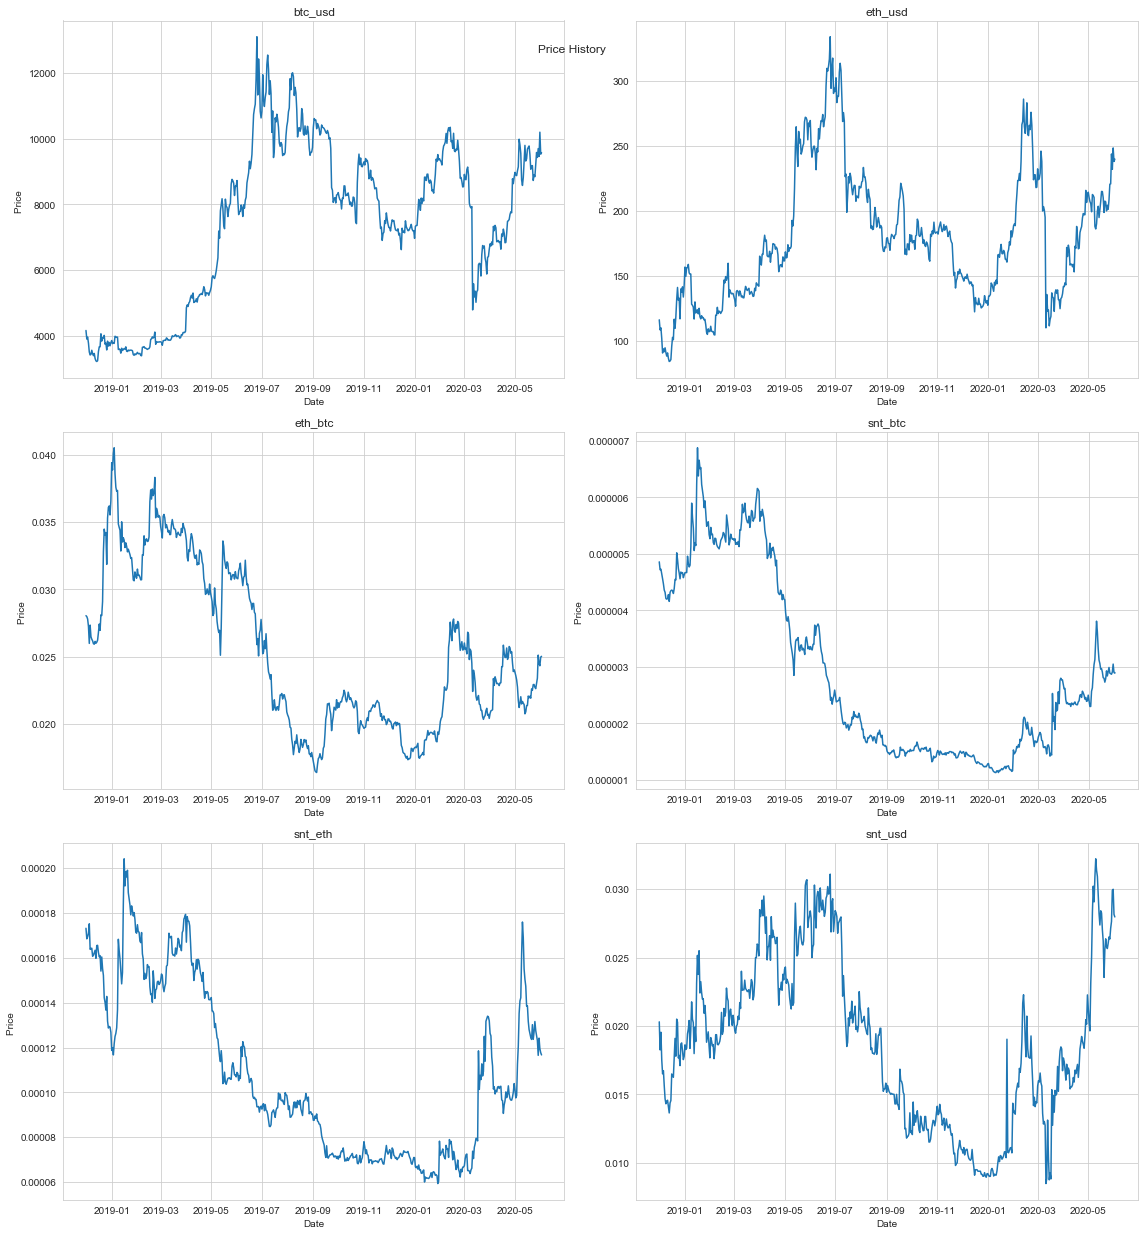

In [16]:
plt.figure(figsize=(16,34))
plt.suptitle('Price History')
for count, name in enumerate(tickers):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(df.index, df[name]) #,legend=True,logy=True )
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Price ')

plt.tight_layout()

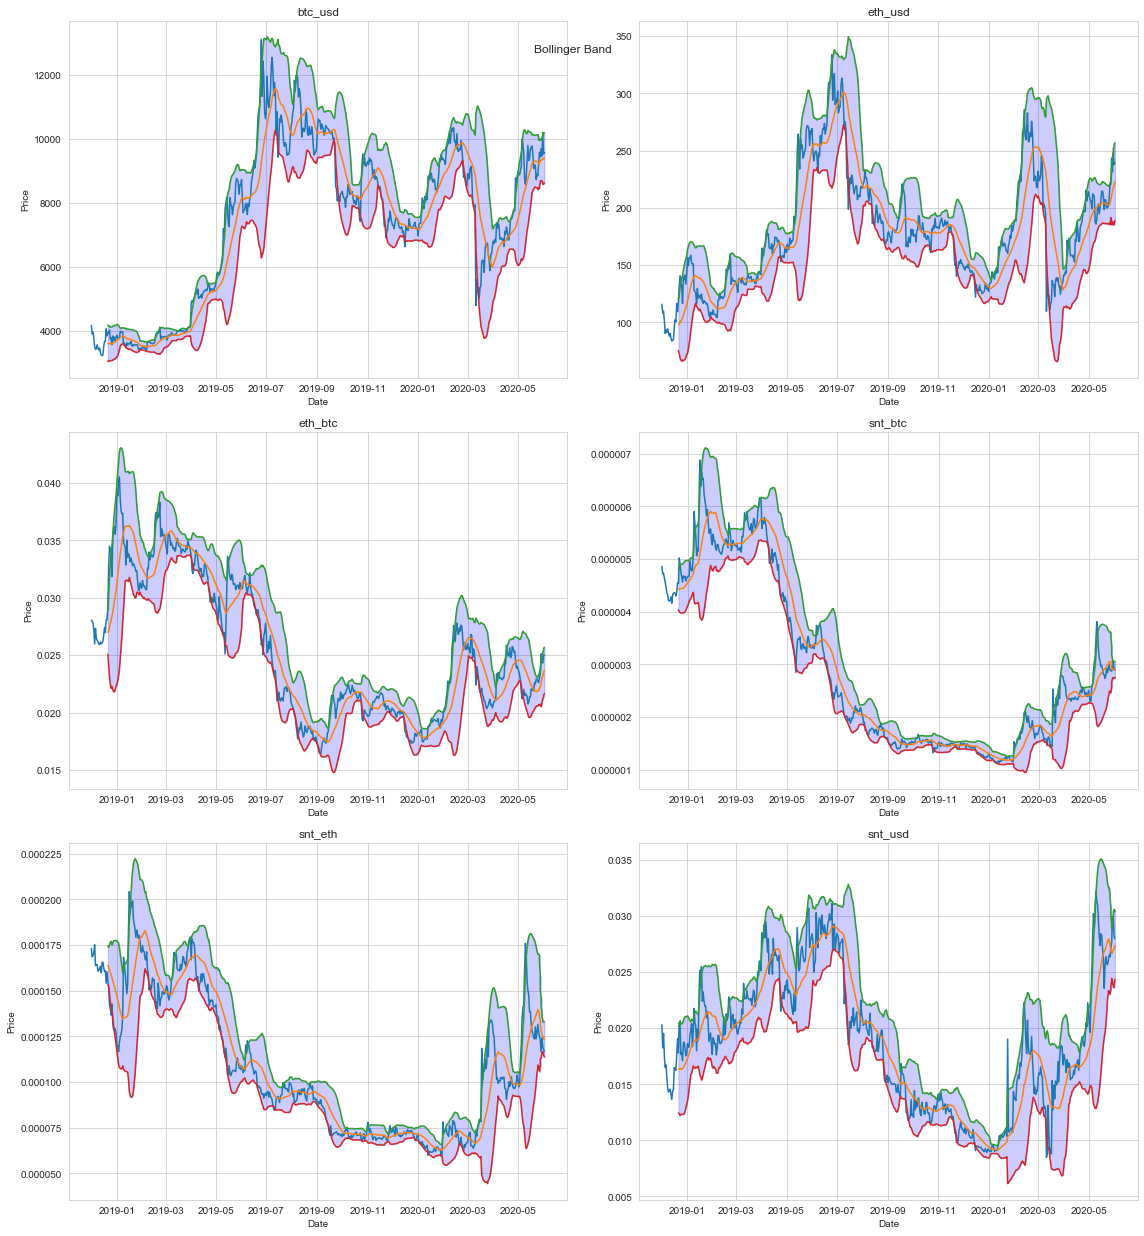

In [17]:
plt.figure(figsize=(16,34))
for count, name in enumerate(df_names):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(df.index, df[tickers[count]])
    plt.plot(middle_band.index, middle_band[tickers[count]]) # name.Close)
    plt.plot(upper_band.index, upper_band[tickers[count]]) # name.Close)
    plt.plot(lower_band.index, lower_band[tickers[count]]) # name.Close)
    plt.fill_between(rolling_std.index, lower_band[tickers[count]], upper_band[tickers[count]], color='b', alpha=0.2)
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Price')
plt.suptitle('Bollinger Band')
plt.tight_layout()

### Correlation

In [18]:
corr_df=returns.corr()
corr_df

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
btc_usd,1.000000,0.812679,0.023497,0.083499,-0.175387,0.523527
eth_usd,0.812679,1.000000,0.596423,0.267503,-0.370392,0.602404
eth_btc,0.023497,0.596423,1.000000,0.345743,-0.403237,0.322770
snt_btc,0.083499,0.267503,0.345743,1.000000,0.579046,0.546751
snt_eth,-0.175387,-0.370392,-0.403237,0.579046,1.000000,0.198048
snt_usd,0.523527,0.602404,0.322770,0.546751,0.198048,1.000000


### Statistics Table

In [19]:
stat_table=pd.DataFrame(index=tickers)
# stat_table.set_index(tickers)
stat_table['Mean']=stats.describe(returns.dropna())[2]
stat_table['Min']=stats.describe(returns.dropna())[1][0]
stat_table['Max']=stats.describe(returns.dropna())[1][1]
stat_table['Variance']=stats.describe(returns.dropna())[3]
stat_table['Std']=returns.dropna().std()
stat_table['Skewness']=stats.describe(returns.dropna())[4]
stat_table['Kurtosis']=stats.describe(returns.dropna())[5]
stat_table['z-value']=stats.kurtosistest(returns.dropna())[0]
stat_table['p-value']=stats.kurtosistest(returns.dropna())[1]
stat_table

,Mean,Min,Max,Variance,Std,Skewness,Kurtosis,z-value,p-value
btc_usd,0.006703,-0.067275,0.119269,0.001537,0.039200,0.789818,0.311905,0.908359,3.636883e-01
eth_usd,0.007572,-0.098842,0.201148,0.002463,0.049624,0.926116,1.895068,2.596659,9.413523e-03
eth_btc,0.001167,-0.068966,0.110161,0.000735,0.027110,0.947969,2.933231,3.235136,1.215848e-03
snt_btc,-0.003698,-0.095541,0.253968,0.001949,0.044144,2.516590,13.326548,5.573829,2.492006e-08
snt_eth,-0.006029,-0.091316,0.089109,0.000891,0.029852,0.282040,1.503856,2.287909,2.214283e-02
snt_usd,-0.000560,-0.158846,0.133333,0.002878,0.053646,0.326104,0.782194,1.558777,1.190492e-01


In [20]:
returns.dropna().describe()

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.006703,0.007572,0.001167,-0.003698,-0.006029,-0.000560
std,0.039200,0.049624,0.027110,0.044144,0.029852,0.053646
min,-0.067275,-0.098842,-0.068966,-0.095541,-0.091316,-0.158846
25%,-0.020389,-0.023406,-0.013218,-0.027778,-0.019117,-0.032251
50%,-0.002587,-0.001267,-0.001851,-0.005608,-0.005849,-0.005142
75%,0.024915,0.037915,0.011573,0.008430,0.007959,0.024211
max,0.119269,0.201148,0.110161,0.253968,0.089109,0.133333


### Covariance

In [21]:
cov_df=returns[1:].dropna().cov()
cov_df

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
btc_usd,0.001494,0.001534,0.000022,0.000124,-0.000227,0.001025
eth_usd,0.001534,0.002423,0.000809,0.000569,-0.000576,0.001527
eth_btc,0.000022,0.000809,0.000744,0.000418,-0.000332,0.000471
snt_btc,0.000124,0.000569,0.000418,0.001965,0.000766,0.001279
snt_eth,-0.000227,-0.000576,-0.000332,0.000766,0.000897,0.000294
snt_usd,0.001025,0.001527,0.000471,0.001279,0.000294,0.002784


#### Annualized Return Analysis

In [22]:
def calc_compound_return(v0,vf,nYears):
    '''
    v0 : Initial value of the investment.
    vf : Final value of the investment.
    nYears : Duration of the investment.
    '''
    growth = float(vf)/v0
    compound_return   = growth**(1./nYears) - 1
    compound_return = compound_return * 100
    return compound_return

def calc_simple_return(v0,vf,nYears):
    '''
    v0 : Initial value of the investment.
    vf : Final value of the investment.
    nYears : Duration of the investment.
    '''
    delta = float(vf) - v0
    simple_return   = delta / v0 /nYears
    simple_return = simple_return *100
    return simple_return

In [23]:
# Get the number of days/years
days = (df.index[0] - df.index[-1]).days
years = days/365

#calculate compound_return
comp_return = [calc_compound_return(df.dropna().loc[:,tick][-1], df.dropna().loc[:,tick][0], years) for tick in tickers]

#calculate simple_return
simp_return = [calc_simple_return(df.dropna().loc[:,tick][-1], df.dropna().loc[:,tick][0], years) for tick in tickers]

#### Value Based, Final - Initial Return, Total Sample

In [24]:
for count, tick in enumerate(tickers):
    print(tick, ' Compounded Return = ', "%.2f" % comp_return[count], \
          '%,  Simple Return = ', "%.2f" % simp_return[count],'%')

btc_usd  Compounded Return =  73.28 %,  Simple Return =  37.40 %
eth_usd  Compounded Return =  61.21 %,  Simple Return =  34.07 %
eth_btc  Compounded Return =  -7.44 %,  Simple Return =  -8.20 %
snt_btc  Compounded Return =  -29.06 %,  Simple Return =  -44.93 %
snt_eth  Compounded Return =  -22.65 %,  Simple Return =  -31.35 %
snt_usd  Compounded Return =  24.31 %,  Simple Return =  18.56 %


In [25]:
# Dataframe with no NAs and 1 added to it
returns.ffill(inplace=True)
compound = returns[1:].apply(lambda x: x+1)

In [26]:
compound.head()

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
timeDate,,,,,,
2018-12-09,0.970139,0.960602,0.995437,0.974537,0.978089,0.974796
2018-12-16,1.085348,1.117695,1.021350,1.002299,0.980676,1.133333
2018-12-23,1.019805,1.070766,1.051220,0.976096,0.934297,0.988780
2018-12-30,0.973474,0.944527,0.981492,0.980728,0.997682,0.964266
2019-01-06,0.996772,0.958893,0.974339,0.987578,1.011209,1.031866


#### Compound Annual Return From Daily Returns

In [27]:
compound_from_daily = (compound.prod() **(52/len(compound)) - 1) * 100 

In [28]:
for tick in tickers:
    compound_from_daily[tick] = (compound[tick].prod() **(52/len(compound[tick].dropna())) - 1) * 100 

In [29]:
compound_from_daily

btc_usd    42.709682
eth_usd    46.397175
eth_btc     4.525188
snt_btc   -20.051803
snt_eth   -27.654396
snt_usd    -3.330629
dtype: float64

#### Simple Annual Return from Daily Returns

In [30]:
simple_from_daily = returns[1:].sum() * 52 / len(returns[1:]) * 100
simple_from_daily

btc_usd    39.418548
eth_usd    44.262384
eth_btc     6.307136
snt_btc   -17.575514
snt_eth   -29.963421
snt_usd     3.697814
dtype: float64

### DELTA OF RETURN ANALYSIS
Change in return from one time period to next

In [31]:
deltas = returns - returns.shift(periods =1)

In [32]:
delta_table=pd.DataFrame(index=tickers)
# delta_table.set_index(tickers)
delta_table['Mean']=stats.describe(deltas.dropna())[2]
delta_table['Min']=stats.describe(deltas.dropna())[1][0]
delta_table['Max']=stats.describe(deltas.dropna())[1][1]
delta_table['Variance']=stats.describe(deltas.dropna())[3]
delta_table['Std']=deltas.dropna().std()
delta_table['Skewness']=stats.describe(deltas.dropna())[4]
delta_table['Kurtosis']=stats.describe(deltas.dropna())[5]
delta_table['z-value']=stats.kurtosistest(deltas.dropna())[0]
delta_table['p-value']=stats.kurtosistest(deltas.dropna())[1]
delta_table

,Mean,Min,Max,Variance,Std,Skewness,Kurtosis,z-value,p-value
btc_usd,0.000856,-0.146179,0.174766,0.003040,0.055134,0.438545,0.704883,1.460100,0.144263
eth_usd,0.000937,-0.213305,0.215634,0.005189,0.072032,0.307770,0.888224,1.678040,0.093339
eth_btc,0.000062,-0.136318,0.134252,0.001704,0.041274,-0.352395,2.165850,2.775978,0.005504
snt_btc,0.000408,-0.264683,0.349510,0.004974,0.070525,0.849091,8.153262,4.823447,0.000001
snt_eth,0.000236,-0.138892,0.082544,0.001832,0.042798,-0.353008,0.413073,1.062691,0.287922
snt_usd,0.001193,-0.162004,0.274905,0.005868,0.076604,0.598681,1.283010,2.083869,0.037172


In [33]:
deltas.dropna().describe()

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.000856,0.000937,0.000062,0.000408,0.000236,0.001193
std,0.055134,0.072032,0.041274,0.070525,0.042798,0.076604
min,-0.146179,-0.213305,-0.136318,-0.264683,-0.138892,-0.162004
25%,-0.032565,-0.047158,-0.020306,-0.030921,-0.025600,-0.045589
50%,-0.005894,-0.007547,0.002498,0.003344,0.002587,-0.007631
75%,0.033535,0.042182,0.023289,0.028560,0.027420,0.046548
max,0.174766,0.215634,0.134252,0.349510,0.082544,0.274905


### Covariance

In [34]:
delta_cov = deltas[1:].dropna().cov()
delta_cov

,btc_usd,eth_usd,eth_btc,snt_btc,snt_eth,snt_usd
btc_usd,0.003040,0.003155,0.000098,0.000328,-0.000494,0.002343
eth_usd,0.003155,0.005189,0.001890,0.001676,-0.001131,0.003579
eth_btc,0.000098,0.001890,0.001704,0.001315,-0.000589,0.001160
snt_btc,0.000328,0.001676,0.001315,0.004974,0.001603,0.003338
snt_eth,-0.000494,-0.001131,-0.000589,0.001603,0.001832,0.000738
snt_usd,0.002343,0.003579,0.001160,0.003338,0.000738,0.005868


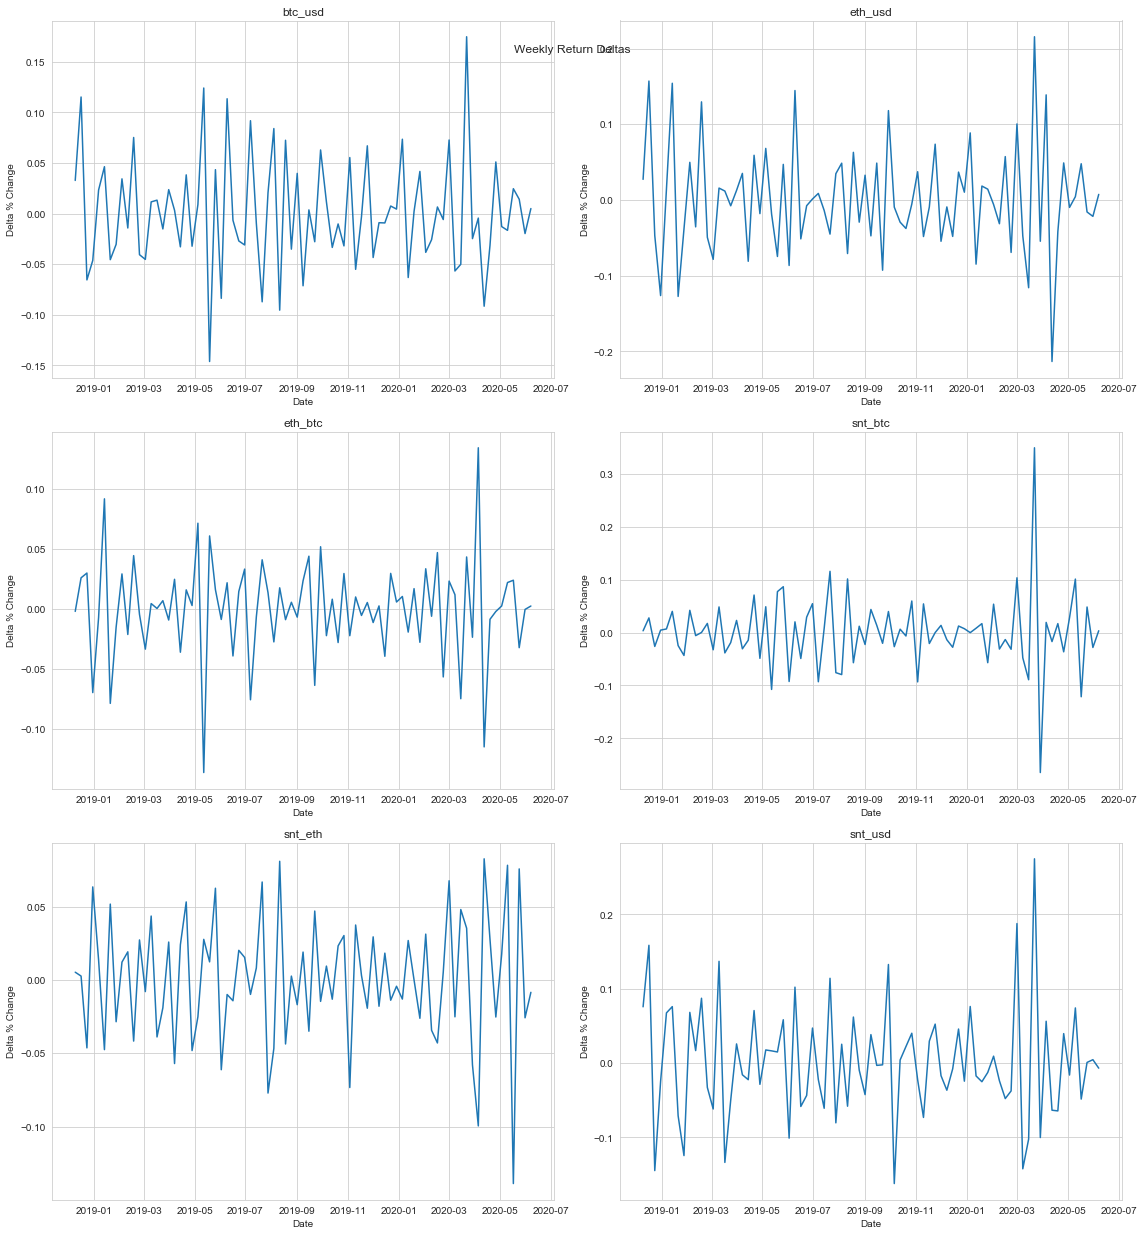

In [35]:
plt.figure(figsize=(16,34))
plt.suptitle('Weekly Return Deltas')
for count, name in enumerate(tickers):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(deltas.index, deltas[name]) #,legend=True,logy=True )
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Delta % Change')

plt.tight_layout()

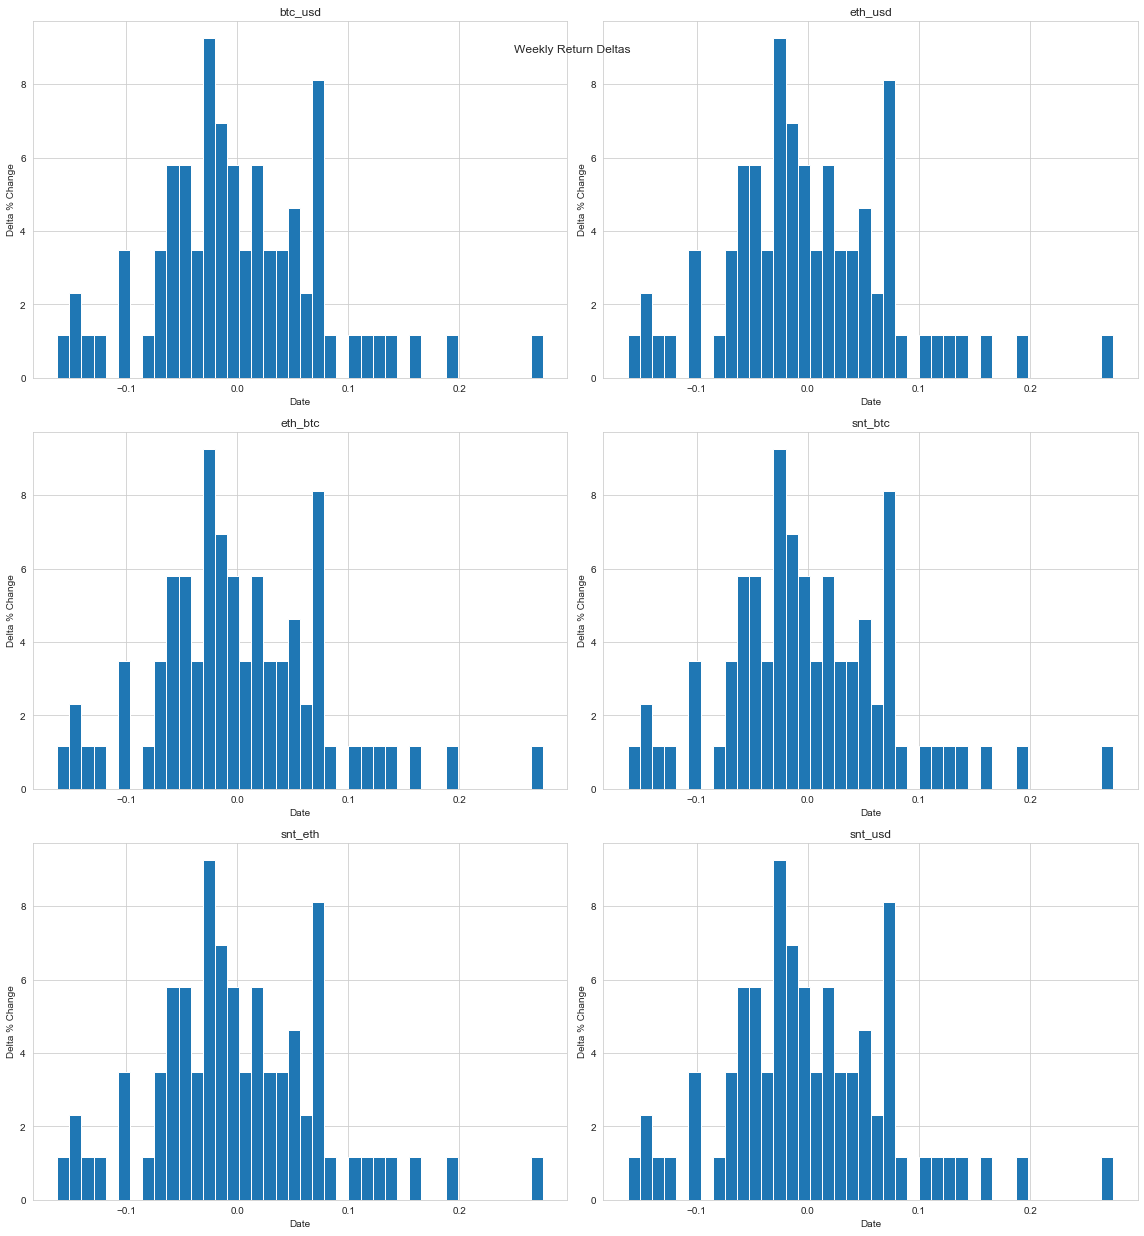

In [36]:
plt.figure(figsize=(16,34))
plt.suptitle('Weekly Return Deltas')
for count, name in enumerate(tickers):
    plt.subplot(len(tickers),2,count+1)
    plt.hist(deltas[tick].dropna(),bins =40, density =True, label = 'Historical Data')
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Delta % Change')

plt.tight_layout()